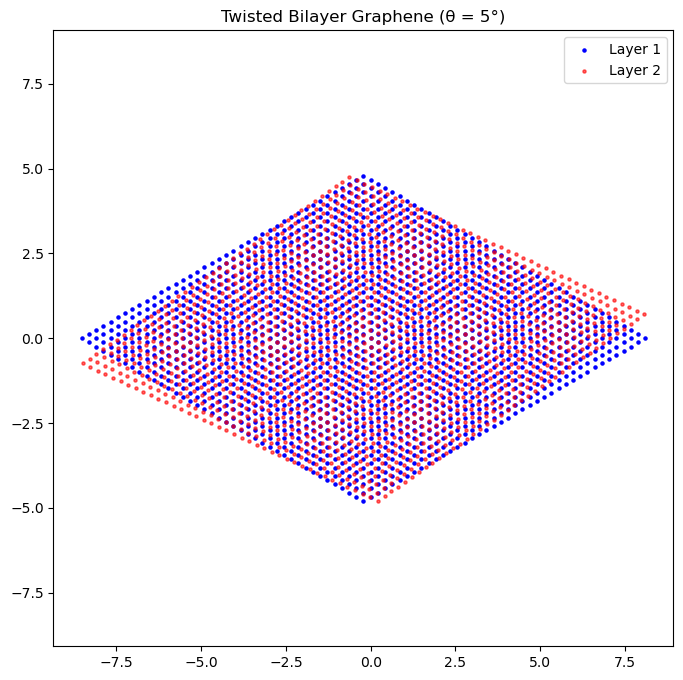

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
a = 0.246  # Graphene lattice constant in nm
theta_deg = 5  # Twist angle in degrees
theta_rad = np.radians(theta_deg) # Convert to radians

# Lattice vectors
a1 = np.array([np.sqrt(3)/2,  1/2]) * a # First layer lattice vector
a2 = np.array([np.sqrt(3)/2, -1/2]) * a # Second layer lattice vector

# Create lattice points
def generate_lattice(a1, a2, N):
    points = [] # List to store lattice points
    for i in range(-N, N): # Loop over x direction
        for j in range(-N, N): # Loop over y direction
            points.append(i * a1 + j * a2) # Generate points
    return np.array(points) 

# Generate monolayer graphene lattice
N = 20  # number of unit cells in each direction
layer1 = generate_lattice(a1, a2, N) # First layer

# Rotate lattice for second layer
def rotate(points, angle_rad):
    rot_matrix = np.array([
        [np.cos(angle_rad), -np.sin(angle_rad)],
        [np.sin(angle_rad),  np.cos(angle_rad)]
    ]) # Rotation matrix
    return points @ rot_matrix.T

layer2 = rotate(layer1, theta_rad) # Second layer

# Plot both layers
plt.figure(figsize=(8, 8))
plt.scatter(layer1[:, 0], layer1[:, 1], s=5, color='blue', label='Layer 1')
plt.scatter(layer2[:, 0], layer2[:, 1], s=5, color='red', alpha=0.6, label='Layer 2')
plt.axis('equal')
plt.title(f'Twisted Bilayer Graphene (θ = {theta_deg}°)')
plt.legend()
plt.show()

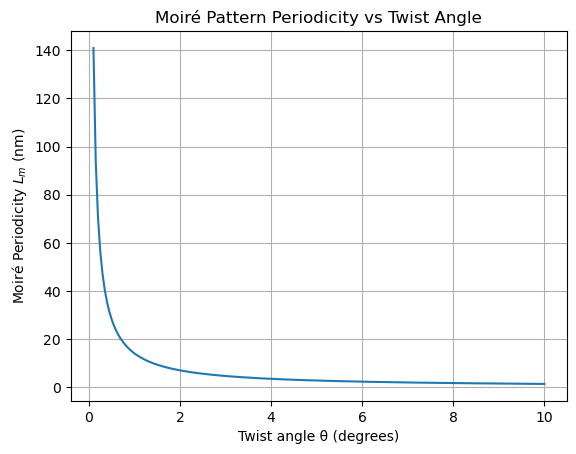

In [101]:
theta_vals = np.linspace(0.1, 10, 200)
theta_rads = np.radians(theta_vals)
Lm_vals = a / (2 * np.sin(theta_rads / 2))

plt.figure()
plt.plot(theta_vals, Lm_vals)
plt.xlabel("Twist angle θ (degrees)")
plt.ylabel("Moiré Periodicity $L_m$ (nm)")
plt.title("Moiré Pattern Periodicity vs Twist Angle")
plt.grid(True)
plt.show()


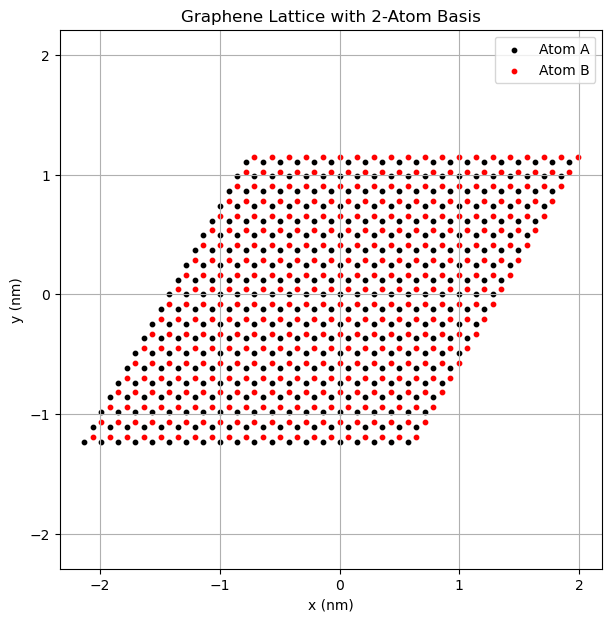

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Carbon-carbon bond length in nm
a = 0.142

# Define primitive lattice vectors (hexagonal Bravais lattice)
a1 = a * np.array([1, 0])
a2 = a * np.array([1/2, np.sqrt(3)/2])

# Basis: 2 atoms per unit cell
basis = [
    np.array([0, 0]),                    # Atom A
    np.array([1/2, np.sqrt(3)/6]) * a    # Atom B (1 bond length away)
]

# Create lattice points
def generate_graphene(a1, a2, basis, N):
    atoms = []
    types = []
    for i in range(-N, N):
        for j in range(-N, N):
            R = i * a1 + j * a2
            for idx, b in enumerate(basis):
                atoms.append(R + b)
                types.append(idx)
    return np.array(atoms), types

# Generate atoms and types
atoms, types = generate_graphene(a1, a2, basis, N=10)

# Plot
plt.figure(figsize=(7, 7))
colors = ['black', 'red']
for idx in range(2):
    points = atoms[np.array(types) == idx]
    plt.scatter(points[:, 0], points[:, 1], s=10, color=colors[idx], label=f'Atom {"A" if idx == 0 else "B"}')

plt.title('Graphene Lattice with 2-Atom Basis')
plt.xlabel('x (nm)')
plt.ylabel('y (nm)')
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.show()


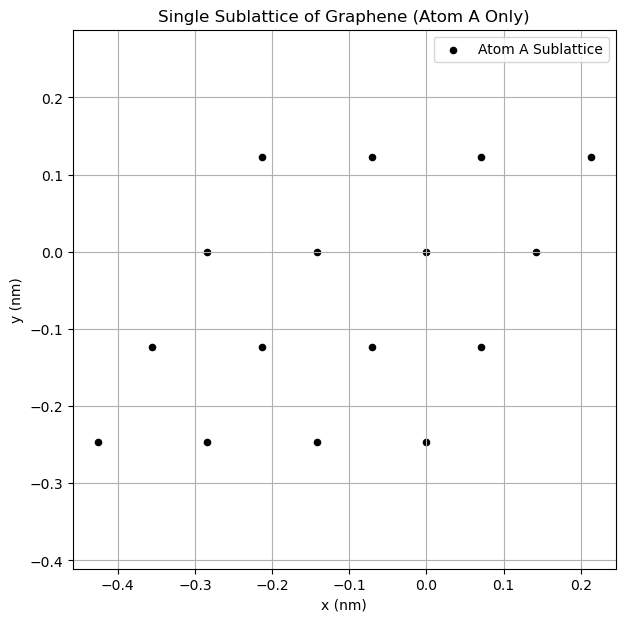

In [92]:
# Generate only one sublattice (e.g., Atom A at each Bravais lattice point)
def generate_single_sublattice(a1, a2, N):
    atoms = []
    for i in range(-N, N):
        for j in range(-N, N):
            R = i * a1 + j * a2
            atoms.append(R)
    return np.array(atoms)

# Generate Atom A sublattice
atoms_A = generate_single_sublattice(a1, a2, N=2)

# Plot only sublattice A
plt.figure(figsize=(7, 7))
plt.scatter(atoms_A[:, 0], atoms_A[:, 1], s=20, color='black', label='Atom A Sublattice')
plt.title('Single Sublattice of Graphene (Atom A Only)')
plt.xlabel('x (nm)')
plt.ylabel('y (nm)')
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.show()


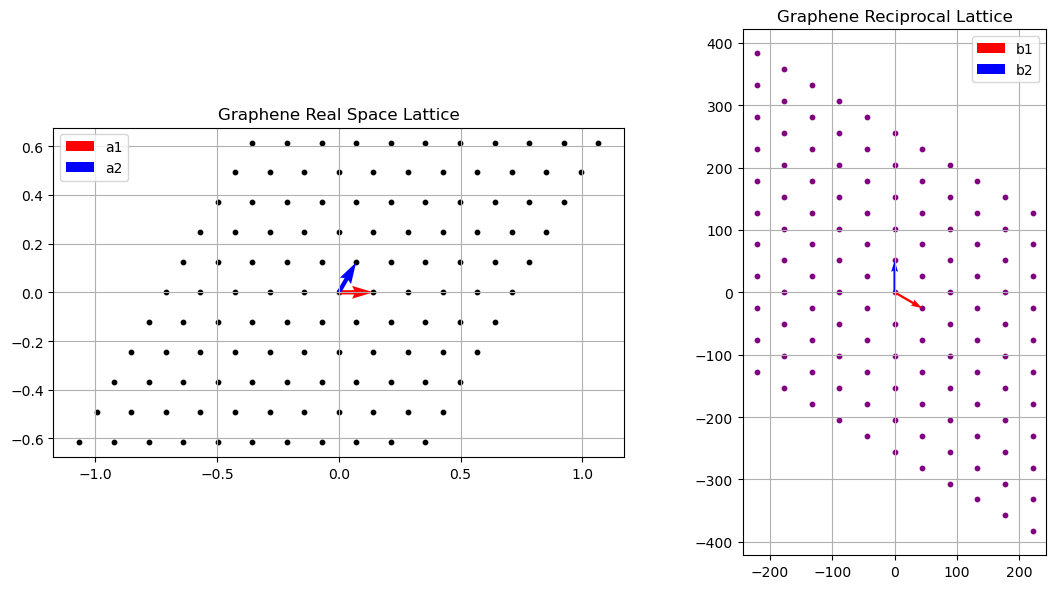

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Real space primitive vectors for graphene (in nm)
a = 0.142
a1 = a * np.array([1, 0])
a2 = a * np.array([1/2, np.sqrt(3)/2])

# Reciprocal lattice vectors
# b1 = 2π (a2⊥) / (a1 · a2⊥), where a2⊥ = ẑ × a2
area = a1[0]*a2[1] - a1[1]*a2[0]  # 2D cross product = area of unit cell
b1 = (2 * np.pi / area) * np.array([a2[1], -a2[0]])
b2 = (2 * np.pi / area) * np.array([-a1[1], a1[0]])

# Generate lattice points
def generate_lattice(v1, v2, N):
    points = []
    for i in range(-N, N+1):
        for j in range(-N, N+1):
            points.append(i * v1 + j * v2)
    return np.array(points)

# Generate points
real_lattice = generate_lattice(a1, a2, 5)
reciprocal_lattice = generate_lattice(b1, b2, 5)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Real space plot
axes[0].scatter(real_lattice[:, 0], real_lattice[:, 1], s=10, color='black')
axes[0].quiver(0, 0, a1[0], a1[1], angles='xy', scale_units='xy', scale=1, color='red', label='a1')
axes[0].quiver(0, 0, a2[0], a2[1], angles='xy', scale_units='xy', scale=1, color='blue', label='a2')
axes[0].set_title("Graphene Real Space Lattice")
axes[0].set_aspect('equal')
axes[0].grid(True)
axes[0].legend()

# Reciprocal space plot
axes[1].scatter(reciprocal_lattice[:, 0], reciprocal_lattice[:, 1], s=10, color='purple')
axes[1].quiver(0, 0, b1[0], b1[1], angles='xy', scale_units='xy', scale=1, color='red', label='b1')
axes[1].quiver(0, 0, b2[0], b2[1], angles='xy', scale_units='xy', scale=1, color='blue', label='b2')
axes[1].set_title("Graphene Reciprocal Lattice")
axes[1].set_aspect('equal')
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()


In [94]:
import matplotlib.animation as animation

# Graphene lattice constant (nm)
a = 0.246

# Real space primitive vectors for graphene
a1 = a * np.array([1, 0])
a2 = a * np.array([1/2, np.sqrt(3)/2])

# Generate lattice points
def generate_lattice(a1, a2, N):
    points = []
    for i in range(-N, N+1):
        for j in range(-N, N+1):
            points.append(i * a1 + j * a2)
    return np.array(points)

# Rotate points by angle theta
def rotate(points, theta_rad):
    R = np.array([
        [np.cos(theta_rad), -np.sin(theta_rad)],
        [np.sin(theta_rad),  np.cos(theta_rad)]
    ])
    return points @ R.T

# Set up figure and axis
fig, ax = plt.subplots(figsize=(6, 6))
sc1 = ax.scatter([], [], s=5, color='black', label='Layer 1')
sc2 = ax.scatter([], [], s=5, color='red', alpha=0.6, label='Layer 2')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_aspect('equal')
ax.legend()
ax.set_title('Moiré Pattern from Twisted Graphene Layers')

# Base lattice
N = 10
base_lattice = generate_lattice(a1, a2, N)

# Animation function
def update(frame):
    theta_deg = frame  # angle in degrees
    theta_rad = np.radians(theta_deg)
    rotated = rotate(base_lattice, theta_rad)
    
    sc1.set_offsets(base_lattice)
    sc2.set_offsets(rotated)
    ax.set_title(f'Moiré Pattern: Twist Angle = {theta_deg:.1f}°')
    return sc1, sc2

# Create animation
ani = animation.FuncAnimation(fig, update, frames=np.linspace(0, 10, 40), interval=200, blit=True)
plt.close()
# Save the animation as a GIF file
ani.save('moire_pattern.gif', writer='imagemagick', fps=60, dpi=100)
ani


MovieWriter imagemagick unavailable; using Pillow instead.
